In [ ]:
#Operation of my pipeline for multiple regression using house price advanced regression dataset/problem


### LINK: PARA REVISAR TODAS LAS TECNICAS DE DATA PROCESSING: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114 
### REFERENCE KERNELS: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
##reference kernl updated: https://www.kaggle.com/amiiiney/price-prediction-top-15-regularization-stacking/comments#2--Data-cleaning

* Assumptions of the Model (multiple linear regression)
* It's essential to understand the assumptions of the model before we start building and coding. Each assumption
* if violated means we may have to take extra steps to improve our model or in some cases dump the model altogether




* ASUMPTIONS OF THE MODEL:

* 1. Regression residuals must be normally distributed.
* 2.  A linear relationship is assumed between the dependent variable and the independent variables.(https://bolt.mph.ufl.edu/6050-6052/unit-1/case-q-q/linear-relationships/)
* 3. The residuals are homoscedastic and approximately rectangular-shaped.
* 4. Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
* Esto ultimo se chequea previo al desarrollo del modelo porque implica eliminar algunas variables)
* 5. No Autocorrelation of the residuals.

In [3]:
##Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer


import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from scipy import stats
from scipy.stats import norm, kurtosis, skew

# Import specific libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std

**1. Reading and Understanding the Data**

In [6]:
# READ THE WHOLE DATASET:
# INPUT: train and test sets already processed (transfomed, rescaled, etc)

#Step 1: Load train and test sets

# # ##Loading train

# x_train = pd.read_csv("../input/4-kernel-mae/train_4.csv")
# y_train = pd.read_csv("../input/data-4-training-mae/y_train_rfe.csv", index_col = 0, names = ["SalePrice"])



# ##Loading test

# x_test = pd.read_csv("../input/4-kernel-mae/test_4.csv", index_col = 0)
# y_test = pd.read_csv("../input/data-4-training-mae/y_test_rfe.csv", index_col = 0, names = ["SalePrice"])


# ## Test original for predictions
# test = pd.read_csv("../input/test-original-index/test_file.csv")


# ##Load kaggle dataset

# df_kag = pd.read_csv("../input/df-kaggle/df_kag.csv", index_col = 0)

%store -r all_2
%store -r  y_train


In [10]:
len_test = all_2.shape[0] - all_2.iloc[:len(y_train), :].shape[0]
y_test = np.zeros((len_test,1))
y_test = pd.DataFrame(y_test)
all_2["SalePrice"] = pd.concat((y_train, y_test), axis = 0)
x_train = all_2[all_2.SalePrice > 0].drop("SalePrice", axis = 1)

In [8]:

#df.head()
# y = df.pop("Rings")
# y = np.log1p(y)
# x = df
#DATA TRANSFORM EXPERIMENT 
#Loading dataset rotulado completo para dividirlo en train/test. Se usará y_train_2 como target
df_t = pd.read_csv("../input/house-win/train_win.csv", index_col = 0)
y = pd.read_csv("../input/house-win/y_train_win.csv", index_col = 0)
#Remove SalePrice column and replace it with y_train_2
# df_t.drop("SalePrice", axis = 1, inplace = True)
#df_t.sort_index() #reordeno indice que traia porque en house price se habian separado train/test con random
#x = df_t.sort_index()
# x = pd.DataFrame(df_t["GrLivArea"])
x = df_t


#Split dataset into train/test
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,test_size=0.2, random_state=101)
# # y_train = pd.read_csv("../input/data-4-training-mae/y_train_rfe.csv", index_col = 0, names = ["SalePrice"])


# # ##Loading test

# x_test = pd.read_csv("../input/data-4-training-mae/x_test_rfe.csv", index_col = 0)
# y_test = pd.read_csv("../input/data-4-training-mae/y_test_rfe.csv", index_col = 0, names = ["SalePrice"])

In [ ]:
##Univariate analysis
# def fit_mae(x, y, target):
# #Add constant and fit the model
#     x_train_rfec = sm.add_constant(x)
#     #lm_rfe = sm.OLS(y, x_train_rfec).fit()
#     lm_rfe = sm.OLS(y, x_train_rfec).fit(cov_type='HC1')
#     #Plotting the variable versus residuals for analysis
#     #Predict
#     y_train_predict =  lm_rfe.predict(x_train_rfec)
#     y_train_predict = pd.DataFrame(y_train_price, columns = target)
#     y_residuals = y - y_train_predict
# #     #Plot y_test and y_pred to visualize the spread
# #     ax, fig = plt.subplots(figsize = (6,6))
# #     plt.scatter(x, y_residuals)
# #     plt.title("Univariate residual analysis")
# #     plt.xlabel("x_train")
# #     plt.ylabel("Y_residuals")

#     return lm_rfe, x_train_rfec
    

In [ ]:
#lm_rfe, x_train_rfec = fit_mae(x_train[["GarageArea", "GrLivArea", "GarageCars","GarageCond","GarageYrBlt","GarageFinish","BsmtQual", "OverallCond", "OverallQual","YearBuilt","TotalSF","PoolArea"]], y_train, target = ["SalePrice"])

In [ ]:
# print(lm_rfe.summary())

In [ ]:
# x_train.shape, y_train.shape

In [ ]:
# x_train.shape

In [32]:
# Feature Importance with Extra Trees Classifier
# from pandas import read_csv
# from sklearn.ensemble import RandomForestRegressor 
# from sklearn import utils
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)
# # print(training_scores_encoded)
# # print(utils.multiclass.type_of_target(y_train))
# # print(utils.multiclass.type_of_target(y_train.astype('int')))
# # print(utils.multiclass.type_of_target(training_scores_encoded))
# # feature extraction
# model = RandomForestRegressor(n_estimators=10)
# model.fit(x_train, y_train)
# #print(list(zip(x_train.columns,model.feature_importances_ * 1000)))
# pca_data = pd.DataFrame({"Feature": x_train.columns, "Score":model.feature_importances_ * 1000 })
# pca_data.sort_values(by = "Score", ascending = False)

,Feature,Score
46,OverallQual,486.8570
58,TotalSF,287.9447
7,BsmtFinSF1,20.1481
25,GarageCars,12.7670
36,LotArea,12.1602
30,GrLivArea,11.9188
0,1stFlrSF,10.4115
56,YearRemodAdd,9.8751
24,GarageArea,8.1492
29,GarageYrBlt,8.1032


In [15]:
# # Feature Extraction with RFE
# from pandas import read_csv
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression
# # load data

# # feature extraction
# reg = LinearRegression()
# reg.fit(x_train, y_train)
# rfe = RFE(reg, 25)
# fit = rfe.fit(x_train, y_train)
# print("Num Features: %d" % fit.n_features_)
# #print("Selected Features: %s" % fit.support_)
# #print("Feature Ranking: %s" % fit.ranking_)

# #Generamos la lista con todas las columans con sus valores de suport_ y ranking_...
# list(zip(x_train.columns, rfe.support_, rfe.ranking_))
# #seleccionamos ahora las variables que tienen support_ = True, que son las 30 mas important features
# col_sup = x_train.columns[rfe.support_ == True]
# #Creamos un nuevo x_train con las columnas seleccionadas
# x_train_rfe = x_train[col_sup]
# x_train_rfe.columns

Num Features: 25


Index(['BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Condition2_RRAe', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'MiscFeature_Gar2', 'MiscFeature_None',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard'],
      dtype='object')

**Step 6: Buiding a Linear Model**

In [11]:
#MODULO: RECURSIVE FEATURE ELIMINATION (RFE) as technique for choosing the variables in the model

def RFE_mae(x_train, y_train, n_var):
    #Apply RFE for the n_var  most significant variables
    lm = LinearRegression() # este es el parametro estimator que usa el rfe para fit el modelo
    lm.fit(x_train, y_train) #fit the training data
    rfe = RFE(estimator = lm, n_features_to_select = n_var)
    rfe = rfe.fit(x_train, y_train)

    #Generamos la lista con todas las columans con sus valores de suport_ y ranking_...
    list(zip(x_train.columns, rfe.support_, rfe.ranking_))
    #seleccionamos ahora las variables que tienen support_ = True, que son las 30 mas important features
    col_sup = x_train.columns[rfe.support_ == True]
    #Creamos un nuevo x_train con las columnas seleccionadas
    x_train_rfe = x_train[col_sup]
    print("Selected features:", x_train_rfe.columns)
    
    #Evaluamos en base a p-value y VIF
    #Adding a constant and building the first fitted model
    x_train_rfec = sm.add_constant(x_train_rfe)
    #lm_rfe = sm.OLS(y_train, x_train_rfec).fit()
    lm_rfe = sm.OLS(y_train, x_train_rfec).fit(cov_type='HC1')
    #Generate the VIF para esta vuelta
    series_1 = pd.Series([variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])], index = x_train_rfe.columns) #se usa el xtrain sin la constante
    
    #Juntamos toda la info en una lista
    v_tuples = [(var, VIF, p) for var, VIF, p in list(zip(series_1.index, series_1.values, lm_rfe.pvalues[1:]))]
    ##Check and choose what variable remove
    #Look for the highest p value first
    from operator import itemgetter
    p_max_var = max(v_tuples,key=itemgetter(2))[0] #entrega nombre de la var con mayor p
    p_max_value = max(v_tuples,key=itemgetter(2))[2] #entrega el valor p mayor
    id_max_p= [i for i,x in enumerate(v_tuples) if x[0] == p_max_var][0] #indice del mayor p
    vif_max_var = max(v_tuples,key=itemgetter(1))[0] #entrega la var con mayor VIF
    vif_max_value = max(v_tuples,key=itemgetter(1))[1] #entrega el valor VIF mayor
    id_max_vif= [i for i,x in enumerate(v_tuples) if x[0] == vif_max_var][0] #indice del mayor vif


    while (p_max_value > 0.05 or vif_max_value > 5):

        #eliminamos primero la variable con mayor p
        if p_max_value > 0.05: #si el p-value esta encima del threshold
            #eliminamos la variable, dado que tiene un p-value alto
            x_train_rfe = x_train_rfe.drop(columns = p_max_var , axis = 1)
            #eliminamos la variable del v_tuples
            del v_tuples[id_max_p]
            #Repetimos el procedimiento...
            #Add constant and fit the model
            x_train_rfec = sm.add_constant(x_train_rfe)
            #lm_rfe = sm.OLS(y_train, x_train_rfec).fit()
            lm_rfe = sm.OLS(y_train, x_train_rfec).fit(cov_type='HC1')
            


        elif vif_max_value > 5: #si VIF esta encima del threshold
            #eliminamos  la variable, dado que tiene un vif alto
            x_train_rfe = x_train_rfe.drop(columns = vif_max_var , axis = 1)
            #eliminamos la variable del v_tuples
            del v_tuples[id_max_vif]
            #Repetimos el procedimiento...
            #Add constant and fit the model
            x_train_rfec = sm.add_constant(x_train_rfe)
            #lm_rfe = sm.OLS(y_train, x_train_rfec).fit()
            lm_rfe = sm.OLS(y_train, x_train_rfec).fit(cov_type='HC1')
            
        
        #Volvemos a llenar el v_tuples
        #Generate the VIF para esta vuelta
        series = pd.Series([variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])], index = x_train_rfe.columns) 

        #Nuevo v_tuples
        v_tuples = [(var, VIF, p) for var, VIF, p in list(zip(series.index, series.values, lm_rfe.pvalues[1:]))]

        #Update the max p_values and VIF to continue

        p_max_var = max(v_tuples,key=itemgetter(2))[0] #entrega nombre de la var con mayor p
        p_max_value = max(v_tuples,key=itemgetter(2))[2] #entrega el valor p mayor
        id_max_p= [i for i,x in enumerate(v_tuples) if x[0] == p_max_var][0] #indice del mayor p
        vif_max_var = max(v_tuples,key=itemgetter(1))[0] #entrega la var con mayor VIF
        vif_max_value = max(v_tuples,key=itemgetter(1))[1] #entrega el valor VIF mayor
        id_max_vif= [i for i,x in enumerate(v_tuples) if x[0] == vif_max_var][0]
        
    return lm_rfe, x_train_rfec 

    
   
    

In [12]:
#Testeamos
lm_rfe, x_train_rfec  = RFE_mae(x_train, y_train,  n_var = all_2.shape[1])
                    
print("Sumario de prueba:", lm_rfe.summary())
print("Variables:", x_train_rfec.columns)
print("Nro var en el modelo.: {}".format(len(x_train_rfec.columns) - 1))

Selected features: Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Remod', 'New', 'Age'],
      dtype='object', length=247)
Sumario de prueba:                             OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1245.
Date:                Fri, 03 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:27:34   Log-Likelihood:                 280.50
No. Observations:                1449   AIC:                            -523.0
Df Residu

In [6]:
unit_f = pd.concat([x_train_rfec, y_train], axis = 1)
unit_f = unit_f.drop(columns = ["const"], axis = 1)



In [7]:
#Preliminar correlation analysis using the data in train set
unit_f.corr()
corr_price = unit_f.corr().loc[:, "SalePrice"] #correlacion respecto del target
signif_numeric = corr_price[(abs(corr_price.values) >= 0.4)].index #guarda las variables mas correlacionadas
relevant_var = corr_price[(abs(corr_price.values) >= 0.4)].sort_values(ascending = False) #listado de correlaciones significativas

In [ ]:
relevant_var

In [ ]:
rel_cols = list(relevant_var.index)
rel_cols

In [ ]:
rel_cols.remove("SalePrice")

In [ ]:
reg = LinearRegression()
cols = rel_cols
x_t = x_train[cols]
y_t = y_train
reg.fit(x_t, y_t)
y_pred_t = reg.predict(x_test[cols])
r2_score(y_test, y_pred_t)

* Step 7: Residual Analysis of the train data

In [ ]:
#Se realiza un analisis opara ver si ambos modelos cumplen con los supuestos de regresion

* ASUMPTIONS OF THE MODEL:
* 
* 1. Regression residuals must be normally distributed.
* 2. A linear relationship is assumed between the dependent variable and the independent variables.(https://bolt.mph.ufl.edu/6050-6052/unit-1/case-q-q/linear-relationships/)
* 3. The residuals are homoscedastic and approximately rectangular-shaped.
* 4. Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
* Esto ultimo se chequea previo al desarrollo del modelo porque implica eliminar algunas variables)
* 5. No Autocorrelation of the residuals.

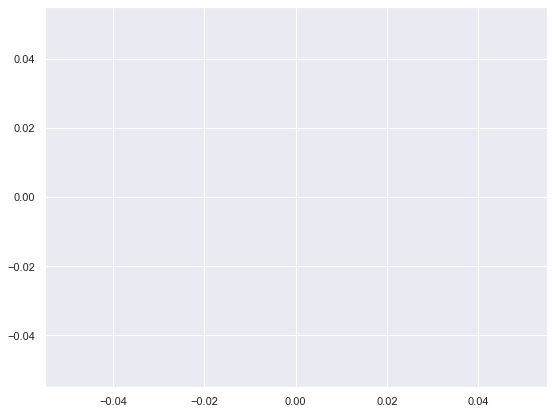

In [13]:
#1. Regression residuals must be normally distributed
## intro to normal distrbution: https://www.youtube.com/watch?v=RKdB1d5-OE0&t=22s
##Utilizamos el qq-plot
## grafico qq-plot: https://www.youtube.com/watch?v=kx_o9rnI4DE

#Generamos los residuos
y_train_price =  lm_rfe.predict(x_train_rfec)
y_train_price = pd.DataFrame(y_train_price, columns = ["SalePrice"])
y_residuals = y_train - y_train_price

#Primero visuals: histogram de los residuos
ax, fig = plt.subplots(figsize = (9,7))
sns.distplot(y_residuals)

In [14]:
y_residuals.head()

,SalePrice,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [ ]:
#Additionally checking with qqplots:

sm.qqplot(y_residuals["SalePrice"], fit = True, line = "45")

In [ ]:
#Probability plot
stats.probplot(y_residuals["SalePrice"], plot = plt)

In [ ]:
#Se ve que en general la curva es normal, con solo algunos puntos que se salen de norma

In [ ]:
y_residuals.kurt(), y_residuals.skew()

In [ ]:
#Kurtosis de una curva normal (excess alrededor de 3) y skew cerca de 0

In [ ]:
##Anderson Darling normality test with H0: Residuals are normally distributed
sm.stats.diagnostic.normal_ad(y_residuals, axis=0)

In [ ]:
print("p-value is:",sm.stats.diagnostic.normal_ad(y_residuals, axis=0)[1] )

In [ ]:
#Dado que el p-value es significativo, se puede rechazar la H0 y por tanto los residuos NO estarian normalmente distribuidos

In [ ]:
#2. A linear relationship is assumed between the dependent variable and the independent variables.(https://bolt.mph.ufl.edu/6050-6052/unit-1/case-q-q/linear-relationships/): 
# H0: A linear relationship exist between the dependent variable and the independent variables


from statsmodels.stats.diagnostic import linear_rainbow, linear_harvey_collier
rainbow = linear_rainbow(lm_rfe)
rainbow_df = {"Test statistic": rainbow[0], "p-value": rainbow[1]}
rainbow_df = pd.DataFrame(rainbow_df, index=["Rainbow test"])
rainbow_df

In [ ]:
#3. Homoskedasticity Test:
#Para testear si hay heteroskedasticity usamos el test White y el  metodo Breusch-Pagan, que usa prueba de hipotesis
#H0: Hay homoskedasticity()

In [ ]:
##Running the White test

_,p_value, _,f_p_value = diag.het_white(y_residuals,lm_rfe.model.exog)
p_value, f_p_value

In [ ]:
#Running the Breusch- Pagan Test...
_,p_value_2, _,f_p_value_2 = diag.het_breuschpagan(y_residuals,lm_rfe.model.exog)
p_value_2,f_p_value_2

In [ ]:
#Ambos grupos de p-values son significativos, por lo que podria recharzase la H0, pero veremos

In [ ]:
#4. Absence of multicollinearity is expected in the model: ya chequeado

In [ ]:
#5. No Autocorrelation of the residuals: 
##For testing autocorrelatrion we use Ljung-Box test for no autocorrelation of residuals. Trabajamos utilizando testeo de hipotesis:
# H0: The data is random / Ha = Data are not random

In [ ]:
##create a variable called lag...
lag = min(10, (len(x_train)//5))

##Perform test...
diag.acorr_ljungbox(y_residuals, lags = lag) ## entrega una serie de p-values

In [ ]:
##Chequear: si el menor valor de los p-values es menor al nivel de significacion 0.05. Si es menor se rechaza hipotesis nula y hay autocorrelation

In [ ]:
#En este caso el menor valor es 0.1566, por lo que no se puede rechazar la hipotesis nula y los datos serian random, detectandose entonces no hay autocorrelacion...
np.min(diag.acorr_ljungbox(y_residuals, lags = lag))

In [ ]:
#Plot the residuals
##grafiquemos...
sm.graphics.tsa.plot_acf(y_residuals) ##graficamos los residuos
##CHEQUEAR: si todos los valores se mantienen dentro de la zona azul (de no autocorrelacion) no hay autocorrelacion

****Step 8: Making predictions using the model

Working with the test set

In [ ]:
x_train_rfec.columns

In [ ]:
#First: Rescale the Test Set (only numerical variables)
#df_test[sig_num_col] = scale.transform(df_test[sig_num_col])

    
#Split into x and y
# y_test = df_test.pop("price")
# x_test = df_test #arriba ya le saque el y

#Add constant to x_train
x_test_1 = sm.add_constant(x_test, has_constant='add')

#Creo un test set con las variables del modelo 10 (5 variables mas la constante)
x_test_new = x_test_1[x_train_rfec.columns]

#Predict
y_pred = lm_rfe.predict(x_test_new)


Step 9: Model Evaluation

In [ ]:
x_train.shape, y_residuals.shape

In [ ]:
#Plot y_test and y_pred to visualize the spread
ax, fig = plt.subplots(figsize = (6,6))
plt.scatter(y_test, y_pred)
plt.title("Spread of test/predicted data")
plt.xlabel("Y_Test")
plt.ylabel("Y_Predicted")



In [ ]:
#Evaluation: Se evalúa usando el R2 y comparando con el R2 del training set (se usa el R2 y no el adjusted)

#R2 Score for test set
r2_test = r2_score(y_test, y_pred)

#R2 del training
y_train_predict =  lm_rfe.predict(x_train_rfec)
r2_train = r2_score(y_train, y_train_predict)

#Reporte
print("Summary:")
print("R2 test set: {:.4}".format(r2_test))
print("R2 training set:{:.4}".format(r2_train))
print("Difference:{:.2} %".format((r2_train - r2_test)/r2_train * 100))



In [ ]:
x_test.head(2)

In [ ]:
#Se ve que el R2 es bastante cercano al del train set y con todas sus variable significativas, por lo que se trata de un buen modelo

In [ ]:
####Módulo de estudio
from statsmodels.tools.eval_measures import rmse

def REF_Compare(x_train, x_test, y_train_, y_test, n_vars):
    #Create summary table
    cols = ["Nr_variables", "R2 train", "R2 test", "% Diff", "RMSE"]
    a = pd.DataFrame(columns = cols)
    for n in n_vars:
        lm_rfe, x_train_rfec  = RFE_mae(x_train, y_train, n) #fit a model with nr of vars
        #test workout
        x_test_1 = sm.add_constant(x_test, has_constant='add')
         #Creo un test set con las variables del modelo 
        x_test_new = x_test_1[x_train_rfec.columns]
        #Predict
        y_pred = lm_rfe.predict(x_test_new)
        #R2 Score for test set
        r2_test = r2_score(y_test, y_pred)
        #R2 del training
        y_train_predict =  lm_rfe.predict(x_train_rfec)
        r2_train = r2_score(y_train, y_train_predict)
        rmse_1 = np.mean(rmse(np.array(y_test), np.array(y_pred)))
        #LLeno la tabla
        a = a.append({"Nr_variables": n, "R2 train": r2_train,"R2 test":r2_test, "% Diff":(r2_train - r2_test)/r2_train * 100, "RMSE": rmse_1}, ignore_index=True)
        
    return a

#n_vars = np.arange(10, 230, 5) ## testeo de todos los valores de 5 en 5
#n_vars =  np.arange(105, 205, 5)
n_vars = np.arange(100, 225, 5)
results = REF_Compare(x_train, x_test, y_train, y_test, n_vars)
results
        
        
        

In [ ]:
results.loc[results["R2 test"] == results["R2 test"].max(), :]

In [ ]:
res_1 = results.loc[results["R2 test"] == results["R2 test"].max(), :]

In [ ]:
res_1

**Step 10: Save model for future predictions
******

In [ ]:
import pickle

# pickle the model: lo guardo cn un nombre
with open('house_price_model.sav','wb') as f:
     pickle.dump( lm_rfe, f)

In [ ]:
#si lo quiero cargar de nuevo..
# load it back in
with open('house_price_model.sav', 'rb') as pickle_file:
     lm_fre_model = pickle.load(pickle_file) #le pongo otro nombre al archivo que traigo

In [ ]:
#y ahora puedo hacer una prediccion creando primero una instancia
#lm_fre_model.predict([x_test_new.loc[13, :]])

In [ ]:
###Test pickle para otro kernel#####
import pickle
# pickle the model: lo guardo cn un nombre
with open('x_train_rfec.sav','wb') as f:
     pickle.dump( x_train_rfec, f)


In [ ]:
#y_test[139]


In [ ]:
x_test_new.head(6)

In [ ]:
###AHORA PUEDON HACER LAS PREDICCIONES DEL TEST SET DE KAGGLE
#CREAR EL KAGGLE TEST SET
#PREPARAR KAGGLE TEST SET: RESCALING
#PREDICT
#SAVE THE PREDICTIONS
#SUBMIT!


In [ ]:
x_train_rfec.columns

In [ ]:
df_kag.columns

In [ ]:
#Crear test de Kaggle
test_def = x_train_rfec.drop(columns = "const")
df_kag = df_kag[test_def.columns]

In [ ]:
len(y_test), len(df_kag)

In [ ]:
np.array_equal(np.array(test.index), np.array(df_kag.index))

In [ ]:
df_kag.head()

In [ ]:

#RESCALING KAGGLE TEST SET 

#MODULE: We will use standarization (x - u /s), so it will return data with mean 0 and sd = 1
scale = preprocessing.StandardScaler()  #creo instancia de la clase


#Apply rescaling to all columns except dummy variables (nominal_cols) 

# n_cols = list(set(df_kag.columns) - set(cat_ordinal) - set(cat_nominal)) #Separate the type of variables in df_train
# o_cols = list(set(df_kag.columns) - set(n_cols) - set(cat_nominal))
# no_cols = list(set(df_kag.columns) - set(n_cols) - set(o_cols))
# scale_columns_test = n_cols + o_cols #This two are going to be rescaled

# df_kag[scale_columns_test] = scale.fit_transform(df_kag[scale_columns_test])


In [ ]:
#Predict
#Add constant to x_train
x_test_1 = sm.add_constant(df_kag)

#Creo un test set con las variables del modelo 10 (5 variables mas la constante)
x_kag = x_test_1[x_train_rfec.columns]

#Predict
y_pred_k = lm_rfe.predict(x_kag)

In [ ]:
y_pred_k.head()

In [ ]:
#Revertir la transformacion logaritmica que hicimos usando exp
y_kaggle = np.exp(y_pred_k)

y_kaggle.head()

In [ ]:
y_kaggle.shape, test.shape

In [ ]:
##Final file and submitting

#Crear el dataframe con los rotulos que piden
y_sub = pd.DataFrame({"Id": test.Id, "SalePrice": y_kaggle.values})

#Convert to csv
y_sub.to_csv('sub_mae_16_abril.csv', index=False)